# Question 1

$x_1$ représente le nombre de proies, $x_2$ le nombre de prédateurs \
$\alpha$ représente le taux de reproduction des proies \
$\beta$ représente le taux de décès dus aux prédateurs \
$\gamma$ représente la proportion de prédateurs décédant par sélection naturelle \
$\delta$ représente la capacité reproductive des prédateurs grâce aux proies 

Soit $f(x_1, x_2) = (x_1(\alpha - \beta x_2), -x_2(\gamma - \delta x_1))$ \
On appelle point d'équilibre les points $(x_1, x_2)$ tels que $f(x_1, x_2) = 0$ \
On a alors $(0, 0)$ comme point d'équilibre immédiat \
Le 2eme point s'obtient en résolvant 

$\begin{cases}
\alpha - \beta x_2 =0 \\
\gamma - \delta x_1 =0
\end{cases}$ \
On obtient alors $\bar{x} = (\gamma / \delta, \alpha / \beta) \in \mathbb{R} _+^* \times \mathbb{R} _+^*$ 
Pour discuter de la stabilité de ces points on écrit la matrice jacobienne de f en tout point $(x_1, x_2)$ \
$J_f(x) = \begin{pmatrix}
\alpha - \beta x_2 & -\beta x_1 \\
\delta x_2 & -\gamma + \delta x_1
\end{pmatrix}$

En $x = (0,0)$ on a $J_f(x) = \begin{pmatrix}
\alpha  & 0 \\
0 & -\gamma 
\end{pmatrix}$ \
Les valeurs propres de cette matrice sont  $\alpha > 0$ et $-\gamma < 0$ 
Donc d'après le lien entre stabilité et stabilité du linéarisé tangent, $(0, 0)$ est un point d'équilibre instable.\
En $\bar{x}$ on a $J_f(\bar{x}) = \begin{pmatrix} 
\ 0 & -\beta \gamma /\delta \\
\delta \alpha / \beta & 0
\end{pmatrix}$

On écrit le polynôme caractéristique :
$\chi(J_f(\bar{x}))(\lambda) = \lambda ^2 + \alpha \gamma$ 

Les racines de ce polynôme caractéristique sont à parties réelles nulles donc on ne peut pas conclure avec le lien entre stabilité et stabilité du linéarisé tangent.

# Question 2

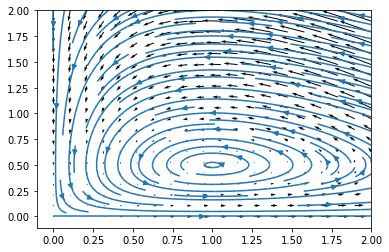

In [2]:
import numpy as np
import matplotlib.pyplot as plt
alpha = 0.1
beta = 0.2
gamma = 0.1
delta = 0.1
def f(x,y):
    return x*(alpha - beta*y), -y*(gamma - delta * x)
x, y = np.meshgrid(np.linspace(0, 2, 20), np.linspace(0, 2, 20))
dx, dy = f(x, y)
plt.quiver(x, y, dx, dy)
plt.streamplot(x,y,dx,dy)
plt.show()